
Date: 31/05/2019

Environment: Python 3.7.0 and Anaconda3 5.2.0(64-bit)




********************************************************************************************************************************

### 1.	Libraries

re 2.2.1 (for regular expression, included in Anaconda Python 3.7.0)

json 2.0.9 (for json file handling, included in Anaconda Python 3.7.0)

datetime(for date time operations, included in Anaconda Python 3.7.0)

math(to perform mathematical calculation, included in Anaconda Python 3.7.0)

pandas (for manipulating dataframes, included in Anaconda Python 3.7.0)

matplotlib(for graphing dataframes, included in Anaconda Python 3.7.0)

numpy(for numeric computations, included in Anaconda Python 3.7.0)

LinearRegression (for regression analysis, included in Anaconda Python 3.7.0)


In [1]:
import pandas as pd
import geopandas as gpd
import requests
import os
from shapely.geometry import Point
import numpy as np
import math


In [742]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import datetime
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import time
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


## Task 1

Task 1 is to collate dataset based on certain specifications. We have been provided wit shape file, GTFS file, Victoria suburb boundary, crime data, and council data. Using these datasets we have to find suburb, nearest train station, distance to nearest train station, travel time to southern cross station, crime average for three years prior to property purchase and home overpriced flag 


## 1.Finding associated suburb 
The suburb is found using geopandas. It returns the geometry of the suburb, therefore VIC_LOC_2 can be found in this geometry.
Thereon the latitude and longitude can be found from the shapefile.


#### Reading the file

In [2]:
shapefile = gpd.read_file("vic_suburb_boundary\VIC_LOCALITY_POLYGON_shp.shp")
#print(shapefile)

In [3]:
shapefile.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552399 -35.07228701, 141.74552..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.668767 -37.39571245, 148.6687620..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92287999 -37.97885997, 142.90449..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82335712 -37.66000897, 147.82312..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.279783 -35.99858911, 141.2798853..."


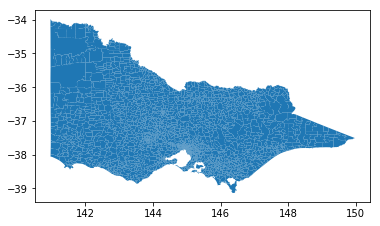

In [5]:
shapefile.plot()

In [6]:
mydata = pd.read_csv("29915651.csv")

In [7]:
mydata.shape

(720, 12)

In [8]:
#Ref https://github.com/bobhaffner/medium_posts/blob/master/geopandas_sjoin/geopandas_sjoin.ipynb
#defining point from lat long in the data
geom = mydata.apply(lambda x : Point([x['Longtitude'],x['Lattitude']]), axis=1)
mydata = gpd.GeoDataFrame(mydata, geometry=geom)

In [9]:
mydata.shape

(720, 13)

In [10]:
mydata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,geometry
0,ID677505543,1A Thelma St,4,t,950000,03-06-2017,2,2,338,119,-37.81065,145.17309,POINT (145.17309 -37.81065)
1,ID424069898,2/5 Pell St,3,t,882000,27-06-2016,2,2,208,24,-37.91080,145.07940,POINT (145.0794 -37.9108)
2,ID714401052,50 Leinster Gr,3,h,1110000,17-09-2016,1,1,562,69,-37.76020,144.98780,POINT (144.9878 -37.7602)
3,ID894840037,197 Albert St,2,h,365000,07-05-2016,1,1,360,59,-37.72730,145.02540,POINT (145.0254 -37.7273)
4,ID416055004,700 Rathdowne St,4,h,2175000,07-05-2016,1,0,418,99,-37.78080,144.97360,POINT (144.9736 -37.7808)


In [ ]:
# getting geometry and suburb from shapefile
shapefile1 = shapefile[['VIC_LOCA_2', 'geometry']]

In [12]:
#locating point from data in the shapefile
datawithsuburb = gpd.sjoin(mydata, shapefile1, op='within')

C:\Users\Stephy\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [14]:
datawithsuburb.shape

(720, 15)

In [15]:
datawithsuburb.isnull().sum().sum()

0

In [260]:
#dropping and renaming columns
datawithsuburb_f = datawithsuburb.drop(columns=['geometry', 'index_right'])
datawithsuburb_f = datawithsuburb_f.rename(columns={'VIC_LOCA_2': 'suburb'})

In [261]:
datawithsuburb_f.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,suburb
0,ID677505543,1A Thelma St,4,t,950000,03-06-2017,2,2,338,119,-37.81065,145.17309,NUNAWADING
372,ID356980044,3/39 Lemon Gr,2,u,710000,26-08-2017,1,1,903,34,-37.80640,145.18452,NUNAWADING
1,ID424069898,2/5 Pell St,3,t,882000,27-06-2016,2,2,208,24,-37.91080,145.07940,BENTLEIGH EAST
39,ID890116976,49 Gowrie St,4,h,1137500,04-06-2016,1,2,696,7,-37.91570,145.08020,BENTLEIGH EAST
98,ID540451567,60A Kennedy St,3,t,935000,03-06-2017,2,2,244,19,-37.92030,145.08074,BENTLEIGH EAST


## 2.Finding associated crime type average 
 
Reading data for crime by location, followed by data cleaning steps.

1> Clean the crime data 

2> Clean the council data

3> Find the crimes A B C, average for past three years for purchases in 2016

4> Find the crimes A B C, average for past three years for purchases in 2017

5> Add this to original data

In [20]:
xlsx = pd.ExcelFile('crimebylocationdatatable-yearending31march2016.xlsx')

In [22]:
#reading sheet 2 of the file
sheet2 = xlsx.parse(1)

In [24]:
#dropping unwanted columns
pos = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
sheet2.drop(sheet2.index[pos], inplace=True)

In [25]:
sheet2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
17,NaN,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
18,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
19,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
20,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
21,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521


In [26]:
#dropping unwanted columns
sheet2.drop(sheet2.columns[[0,2,3,6,8,9]], axis=1, inplace=True)

In [28]:
#selecting and renaming wanted columns
sheet2.columns=['period', 'local_govt', 'offence', 'offence_cnt']

In [30]:
#creating copy
local_govt = sheet2.copy()
#sheet2 = local_govt.copy()

In [31]:
#dropping firt column
pos = [0]
sheet2.drop(sheet2.index[pos], inplace=True)

In [252]:
sheet2.head()

,period,local_govt,offence,offence_cnt
18,2012,BANYULE,A Crimes against the person,4
19,2012,BANYULE,A Crimes against the person,568
20,2012,BANYULE,A Crimes against the person,132
21,2012,BANYULE,A Crimes against the person,12
22,2012,BANYULE,A Crimes against the person,46


### Reading council data as it will be used to map local govt body and suburb 



In [34]:
councils = pd.read_csv('councils.txt', sep=":", header=None)
councils.columns = ["local_govt", "suburb_list"]

In [45]:
councils.head()

,local_govt,0
0,BANYULE,'Abbotsford'
1,BANYULE,'Airport West'
2,BANYULE,'Albert Park'
3,BANYULE,'Alphington'
0,BRIMBANK,'Altona'


In [42]:
#cleaning council data
for i in range(len(councils)):
    councils.suburb_list.iloc[i] = councils.suburb_list.iloc[i].replace("[", "")
    councils.suburb_list.iloc[i] = councils.suburb_list.iloc[i].replace("]", "")
    councils.suburb_list.iloc[i] = councils.suburb_list.iloc[i].strip()
    

In [44]:
#https://stackoverflow.com/questions/41244981/extract-comma-separated-values-to-individual-rows-in-pandas
councils = councils.set_index('local_govt').suburb_list.str.split(',', expand=True).stack().reset_index('local_govt')


In [46]:
#renaming council data
councils = councils.rename(columns={0:'suburb'})\
  .reset_index(drop=True)

In [61]:
#cleaning council data
for i in range(len(councils)):
    councils.suburb.iloc[i] = councils.suburb.iloc[i].replace("'", "")
    councils.suburb.iloc[i] = councils.suburb.iloc[i].strip()
    councils.local_govt.iloc[i] = councils.local_govt.iloc[i].strip()
    

In [62]:
for i in range(len(sheet2)):
    sheet2.local_govt.iloc[i] = sheet2.local_govt.iloc[i].strip()

In [149]:
local_govt_sub = pd.merge(sheet2, councils,  how='left', left_on=['local_govt'], right_on = ['local_govt'])

The crime rate is calculated by creating columns, 2017 and 2016 as purchases were made only in these two years.
The difference of these two year is calculated with crime year respectively.
Only the rows which are 1,2,3 are selected
Dataframe for 2016 and 2017 is separated and crime avergae is calculated by aggregating at year, local government level.

In [150]:
#creating dummy columns to represent purchase year
local_govt_sub['Year16'] = 2016
local_govt_sub['Year17'] = 2017

In [151]:
#taking difference
local_govt_sub['16_diff'] = local_govt_sub['Year16'] - local_govt_sub['period']
local_govt_sub['17_diff'] = local_govt_sub['Year17'] - local_govt_sub['period']

In [207]:
#selecting rows which have difference as 1,2,3 only 
valid_diff=[1,2,3]
local_govt_sub16 = local_govt_sub[local_govt_sub['16_diff'].isin(valid_diff)]
local_govt_sub17 = local_govt_sub[local_govt_sub['17_diff'].isin(valid_diff)]

In [167]:
#rolling up 2016 data, and calculating offence average
local_govt_sub_16 = local_govt_sub16.drop(columns=['period', 'suburb', 'Year17', '16_diff', '17_diff'])
local_govt_sub_16["offence_cnt"] = pd.to_numeric(local_govt_sub_16["offence_cnt"])
local_govt_sub_161 = local_govt_sub_16.groupby(['local_govt', 'offence', 'Year16']).agg({'offence_cnt':'mean'}).reset_index()


In [230]:
#rolling up 2017 data, and calculating offence average
local_govt_sub_17 = local_govt_sub17.drop(columns=['period', 'suburb', 'Year16', '16_diff', '17_diff'])
local_govt_sub_17["offence_cnt"] = pd.to_numeric(local_govt_sub_17["offence_cnt"])
local_govt_sub_171 = local_govt_sub_17.groupby(['local_govt', 'offence', 'Year17']).agg({'offence_cnt':'mean'}).reset_index()


In [231]:
# creating dummy variables to represent crimetype
local_govt_sub_161['Crimetype'] = 0
local_govt_sub_171['Crimetype'] = 0

In [178]:
#stripping and extracting the first alphabet of crime type
for i in range(len(local_govt_sub_161)):
    local_govt_sub_161.offence.iloc[i] = local_govt_sub_161.offence.iloc[i].strip()
    local_govt_sub_161['Crimetype'].iloc[i] = local_govt_sub_161['offence'].iloc[i][0]


C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [232]:
#stripping and extracting the first alphabet of crime type
for i in range(len(local_govt_sub_171)):
    local_govt_sub_171.offence.iloc[i] = local_govt_sub_171.offence.iloc[i].strip()
    local_govt_sub_171['Crimetype'].iloc[i] = local_govt_sub_171['offence'].iloc[i][0]

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [237]:
local_govt_sub_171.head()

,local_govt,offence,Year17,offence_cnt,Crimetype
0,ALPINE,A Crimes against the person,2017,19.785714,A
1,ALPINE,B Property and deception offences,2017,52.000000,B
2,ALPINE,C Drug offences,2017,11.000000,C
3,ALPINE,D Public order and security offences,2017,30.444444,D
4,ALPINE,E Justice procedures offences,2017,20.000000,E


In [239]:
#joining 2016 and 2017 data
final_crime_data = pd.concat([local_govt_sub_161, local_govt_sub_171])

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [276]:
#combining to get year column from the dummy year column
final_crime_data = pd.merge(final_crime_data, councils,  how='left', left_on=['local_govt'], right_on = ['local_govt'])
final_crime_data['Year16'] = final_crime_data['Year16'].fillna('') 
final_crime_data['Year17'] = final_crime_data['Year17'].fillna('')
final_crime_data['year'] = final_crime_data['Year16'].map(str) + final_crime_data['Year17'].map(str)


In [288]:
final_crime_data['year']  = pd.to_numeric(final_crime_data['year'])
final_crime_data['year']  = int(final_crime_data['year'])
final_crime_data['year'] = final_crime_data['year'].astype('int') 

In [290]:
final_crime_data.head()

,Crimetype,Year16,Year17,local_govt,offence,offence_cnt,suburb,year
0,A,2016,,ALPINE,A Crimes against the person,17.466667,Ivanhoe East,2016
1,A,2016,,ALPINE,A Crimes against the person,17.466667,Jacana,2016
2,A,2016,,ALPINE,A Crimes against the person,17.466667,Kingsbury,2016
3,A,2016,,ALPINE,A Crimes against the person,17.466667,Kingsville,2016
4,B,2016,,ALPINE,B Property and deception offences,50.400000,Ivanhoe East,2016


In [291]:
#separating the data by crime type
final_crime_dataA = final_crime_data[final_crime_data.Crimetype=='A']
final_crime_dataB = final_crime_data[final_crime_data.Crimetype=='B']
final_crime_dataC = final_crime_data[final_crime_data.Crimetype=='C']

In [302]:
#ref https://stackoverflow.com/questions/31269216/applying-uppercase-to-a-column-in-pandas-dataframe
#changing suburb to upper case to join later on 
final_crime_dataA.suburb = final_crime_dataA.suburb.str.upper()
final_crime_dataB.suburb = final_crime_dataB.suburb.str.upper()
final_crime_dataC.suburb = final_crime_dataC.suburb.str.upper()

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [265]:
#last final data, with suburb information
datawithsuburb_f.head()
#adding year to it 
datawithsuburb_f['year'] = pd.DatetimeIndex(datawithsuburb_f['Date']).year

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,suburb,year
0,ID677505543,1A Thelma St,4,t,950000,03-06-2017,2,2,338,119,-37.81065,145.17309,NUNAWADING,2017
372,ID356980044,3/39 Lemon Gr,2,u,710000,26-08-2017,1,1,903,34,-37.80640,145.18452,NUNAWADING,2017
1,ID424069898,2/5 Pell St,3,t,882000,27-06-2016,2,2,208,24,-37.91080,145.07940,BENTLEIGH EAST,2016
39,ID890116976,49 Gowrie St,4,h,1137500,04-06-2016,1,2,696,7,-37.91570,145.08020,BENTLEIGH EAST,2016
98,ID540451567,60A Kennedy St,3,t,935000,03-06-2017,2,2,244,19,-37.92030,145.08074,BENTLEIGH EAST,2017


In [303]:
#adding crime A average to the data 
datawithsuburb_fA = pd.merge(datawithsuburb_f, final_crime_dataA,  how='left', left_on=['suburb', 'year'], right_on = ['suburb', 'year'])
datawithsuburb_fA = datawithsuburb_fA.drop(columns=['Year16', 'Year17', 'local_govt', 'offence', 'Crimetype'])
datawithsuburb_fA = datawithsuburb_fA.rename(columns={'offence_cnt': 'crime_A_average'})

In [316]:
#adding crime B average to the data 
datawithsuburb_fB = pd.merge(datawithsuburb_fA, final_crime_dataB,  how='left', left_on=['suburb', 'year'], right_on = ['suburb', 'year'])
datawithsuburb_fB = datawithsuburb_fB.drop(columns=['Year16', 'Year17', 'local_govt', 'offence', 'Crimetype'])
datawithsuburb_fB = datawithsuburb_fB.rename(columns={'offence_cnt': 'crime_B_average'})

In [322]:
#adding crime C average to the data 
datawithsuburb_fC= pd.merge(datawithsuburb_fB, final_crime_dataC,  how='left', left_on=['suburb', 'year'], right_on = ['suburb', 'year'])
datawithsuburb_fC= datawithsuburb_fC.drop(columns=['Year16', 'Year17', 'local_govt', 'offence', 'Crimetype'])
datawithsuburb_fC = datawithsuburb_fC.rename(columns={'offence_cnt': 'crime_C_average'})

In [327]:
datawithsuburb_fC.isnull().sum().sum()

0

## 3.Finding nearest train stop, distance and assocaited min travel time to cbd

Reading data file from the GTFS data.
The data consistes of information regaring train schedule in folder 1(regional) and folder 2(metro)

Steps:

1> Read the relevant data files from GTFS folder. THis includes trip data, calendar data, stops data, stoptime data and route data. These files are read only from folder 1 and 2 as they currespond to Metro and Regional train details. Concat the two sets of data and merge based on relevant join key.

2> Filter the trip_ids that run on all weekdays

3> Filter the trips which have Southern Cross as stop_id

4> Based on these trip_ids, filter the original data

5> Now filter the trip_ids that run between 7:00AM to 9:30AM 

6> Now add arrival time to this dataset from the southern cross dataset 

7> Filter the data where arrival time is greater than departure time

These are the most relevant trip_ids as they meet the criteria for direct trip to Southern Cross on all weekdays between 7:00AM to 9:30 AM.

8> Based on the stop_ids from these trip_ids, Calculate the minimum distance from address latitude longitude to the stop latitude longitude

9> The curresponding stop ID would be the nearest station and minimum distance would be the distance to the train station.

10> Now take the difference of arrival time and departure time and aggregate it at stop_id level to get the average time of all the trips satisfying base criteria from given stop id

In [414]:
#train stop ID
#1 regional
#2 metro

#trip detail
trips_1=pd.read_csv("./gtfs/1/google_transit/trips.txt")
trips_2=pd.read_csv("./gtfs/2/google_transit/trips.txt")

#calendar details for trips 
calendar_1=pd.read_csv("./gtfs/1/google_transit/calendar.txt")
calendar_2=pd.read_csv("./gtfs/2/google_transit/calendar.txt")

#stop details for trips
stops_1=pd.read_csv("./gtfs/1/google_transit/stops.txt")
stops_2=pd.read_csv("./gtfs/2/google_transit/stops.txt")

#stop time details for trips
stoptime_1=pd.read_csv("./gtfs/1/google_transit/stop_times.txt")
stoptime_2=pd.read_csv("./gtfs/2/google_transit/stop_times.txt")

#route details for trips 
routes_1=pd.read_csv("./gtfs/1/google_transit/routes.txt")
routes_2=pd.read_csv("./gtfs/2/google_transit/routes.txt")

#concatenating regional and metro data
trips=pd.concat([trips_1,trips_2])
stops=pd.concat([stops_1,stops_2])
stoptime=pd.concat([stoptime_1,stoptime_2])
routes=pd.concat([routes_1,routes_2])
calendar=pd.concat([calendar_1,calendar_2])



In [415]:
#merging data frames
stop_stoptime = pd.merge(stops,stoptime,on='stop_id',how='inner')
stop_stoptime_trip = pd.merge(stop_stoptime,trips,on='trip_id',how='inner')
stop_stoptime_trip_cal = pd.merge(stop_stoptime_trip,calendar,on='service_id',how='inner')
stop_stoptime_trip_cal_route = pd.merge(stop_stoptime_trip_cal,routes,on='route_id',how='inner')

In [419]:
#applying the conditions for nearest staion ID
#1. Direct trip to southern cross on weekdays (and condition)
#2  departure from 7-9:30

In [420]:
#filtering for weekdays as only the trains running on weekday is not considered
stop_stoptime_trip_cal_route['weekday_flg'] = 0

stop_stoptime_trip_cal_route['weekday_flg'] = stop_stoptime_trip_cal_route['monday']+\
stop_stoptime_trip_cal_route['tuesday']+\
stop_stoptime_trip_cal_route['wednesday']+\
stop_stoptime_trip_cal_route['thursday']+\
stop_stoptime_trip_cal_route['friday']

In [421]:
#only those data points are required which are running on all weekday
stop_stoptime_trip_cal_route[stop_stoptime_trip_cal_route['weekday_flg'] == 5].count()

stop_id                108167
stop_name              108167
stop_lat               108167
stop_lon               108167
trip_id                108167
arrival_time           108167
departure_time         108167
stop_sequence          108167
stop_headsign               0
pickup_type            108167
drop_off_type          108167
shape_dist_traveled    108167
route_id               108167
service_id             108167
shape_id               108167
trip_headsign          108167
direction_id           108167
monday                 108167
tuesday                108167
wednesday              108167
thursday               108167
friday                 108167
saturday               108167
sunday                 108167
start_date             108167
end_date               108167
agency_id                   0
route_short_name        88366
route_long_name        108167
route_type             108167
route_color            108167
route_text_color       108167
weekday_flg            108167
dtype: int

In [432]:
weekday_trips = stop_stoptime_trip_cal_route[stop_stoptime_trip_cal_route['weekday_flg'] == 5]

In [445]:
weekday_trips.nunique()

stop_id                 325
stop_name               309
stop_lat                315
stop_lon                315
trip_id                3764
arrival_time           1285
departure_time         1285
stop_sequence            32
stop_headsign             0
pickup_type               2
drop_off_type             2
shape_dist_traveled    1869
route_id                 76
service_id                4
shape_id                864
trip_headsign            33
direction_id              2
monday                    1
tuesday                   1
wednesday                 1
thursday                  1
friday                    1
saturday                  1
sunday                    1
start_date                5
end_date                  4
agency_id                 0
route_short_name         16
route_long_name          31
route_type                1
route_color               2
route_text_color          1
weekday_flg               1
dtype: int64

In [462]:
#filtering data point for s
SC_trips=weekday_trips[(weekday_trips['stop_id']==20043) | (weekday_trips['stop_id']==22180)]
SC_trips_trip_id=SC_trips[['trip_id']]
SC_trips_trip_id_list = SC_trips_trip_id["trip_id"].tolist()
weekday_SC = weekday_trips[weekday_trips['trip_id'].isin(SC_trips_trip_id_list)]
weekday_SC_morn = weekday_SC[(weekday_SC["departure_time"]>="07:00:00") & (dummy5["departure_time"]<="09:30:00")]
weekday_SC_morn

In [479]:
datatillnow = datawithsuburb_fC.copy()

In [626]:
#All stops that have direct train to SC, weekday, 7-9:30
STOPS_dept = weekday_SC_morn.loc[:,['stop_id', 'trip_id', 'departure_time','stop_name']]
#Trips for southern cross
SC_stop_time=stoptime[(stoptime['stop_id']==20043) | (stoptime['stop_id']==22180)]
SC_arrival = SC_stop_time.loc[:,['stop_id', 'trip_id', 'arrival_time']]
ARR_DEPT = pd.merge(STOPS_dept,SC_arrival,on='trip_id',how='inner')

In [640]:
#Taking only trips that are running towards Southern Cross
ARR_DEPT1 = ARR_DEPT[ARR_DEPT['arrival_time'] >= ARR_DEPT['departure_time']]

In [653]:
valid_stop_list = ARR_DEPT1['stop_id_x'].tolist()

In [654]:
valid_stops = weekday_SC_morn[weekday_SC_morn['stop_id'].isin(valid_stop_list)]

In [657]:
all_SC_trips_stop_id.nunique()

stop_id      287
stop_name    271
stop_lat     277
stop_lon     277
dtype: int64

In [656]:
all_SC_trips_stop_id = valid_stops.loc[:,['stop_id', 'stop_name', 'stop_lat', 'stop_lon']]

In [658]:
#Calculating distance 
def distance(lat1,lon1,lat2,lon2):
    radius = 6378.0  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    d = d*1000
    return d

In [659]:
#Output for distance and train stop ID
for i,j in datawithsuburb_fC.iterrows():
    dist = []
    stop_id = []
    for x,y in all_SC_trips_stop_id.iterrows():
        d = distance(float(j["Lattitude"]),float(j["Longtitude"]),float(y["stop_lat"]),float(y["stop_lon"]))
        dist.append(d)
        stop_id.append(y["stop_id"])
    min_dist = np.argmin(dist)
    datawithsuburb_fC.loc[i,"train_station_id"] = stop_id[min_dist]
    datawithsuburb_fC.loc[i,"distance_to_train_stat"] = dist[min_dist]

In [662]:
datawithsuburb_fC.nunique()

ID                        683
Address                   682
Rooms                       7
Type                        3
Price                     432
Date                       56
Bathroom                    7
Car                         8
Landsize                  427
Age                        75
Lattitude                 639
Longtitude                642
suburb                    189
year                        2
crime_A_average           101
crime_B_average           101
crime_C_average            99
train_station_id          165
distance_to_train_stat    680
dtype: int64

In [665]:
ARR_DEPT1["Time"] = abs(pd.to_datetime(ARR_DEPT1['arrival_time']) - pd.to_datetime(ARR_DEPT1['departure_time']))
ARR_DEPT1["travel_min_to_CBD"] = (ARR_DEPT1["Time"].dt.total_seconds())/60

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [667]:
#Taking mean of the travel time from a station to SC
time_data = ARR_DEPT1[["stop_id_x","stop_name","travel_min_to_CBD"]]
time_data_mean = time_data.groupby("stop_id_x").agg({"travel_min_to_CBD":"mean"}).reset_index()

In [669]:
time_data_mean.sort_values('travel_min_to_CBD')

,stop_id_x,travel_min_to_CBD
256,22180,0.000000
193,20043,0.000000
16,19854,3.180645
3,19841,3.407821
257,22238,3.500000
4,19842,4.744444
5,19843,6.100559
127,19973,6.250000
178,20026,6.400000
258,22239,7.000000


In [675]:
final1 = pd.merge(datawithsuburb_fC,time_data_mean,left_on='train_station_id',right_on = "stop_id_x",how='left')

In [676]:
time_data_mean.to_csv("time_stop.csv")

###  4. Over priced

This column is useful in identifying if a property's price is greater that the median price of other properties in the same suburb. This is calculated by grouping based on suburb, type, rooms, bathroom, car and year. Then finding if a property price is greater than median price. 

In [677]:
#Grouping to get median 
over_priced_med = final1.groupby(['suburb','Type','Rooms','Bathroom','Car','year']).agg({'Price':'median'}).reset_index()

In [678]:
#Joining with main data
final2 = pd.merge(final1, over_priced_med,  how='left', left_on=['suburb','Type','Rooms','Bathroom','Car','year'], right_on = ['suburb','Type','Rooms','Bathroom','Car','year'])

In [679]:
#Flagging
final2['over_priced?'] = -1
for i in range(len(final2)):
    if (final2['Price_x'].iloc[i] > final2['Price_y'].iloc[i]):
        final2['over_priced?'].iloc[i] = 1
    else:
        final2['over_priced?'].iloc[i] = 0
         

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [680]:
final3 = final2.copy()

In [681]:
final3.columns

Index(['ID', 'Address', 'Rooms', 'Type', 'Price_x', 'Date', 'Bathroom', 'Car',
       'Landsize', 'Age', 'Lattitude', 'Longtitude', 'suburb', 'year',
       'crime_A_average', 'crime_B_average', 'crime_C_average',
       'train_station_id', 'distance_to_train_stat', 'stop_id_x',
       'travel_min_to_CBD', 'Price_y', 'over_priced?'],
      dtype='object')

In [682]:
final = final3.rename(columns={'Price_x':'Price', 'suburb':'Suburb', 'Lattitude':'Latitude', 'Longtitude':'Longitude'})

In [683]:
final.columns

Index(['ID', 'Address', 'Rooms', 'Type', 'Price', 'Date', 'Bathroom', 'Car',
       'Landsize', 'Age', 'Latitude', 'Longitude', 'Suburb', 'year',
       'crime_A_average', 'crime_B_average', 'crime_C_average',
       'train_station_id', 'distance_to_train_stat', 'stop_id_x',
       'travel_min_to_CBD', 'Price_y', 'over_priced?'],
      dtype='object')

In [684]:
final = final[['ID', 'Address', 'Suburb', 'Price', 'Type', 'Date', 'Rooms', 'Bathroom',
                       'Car', 'Landsize', 'Age', 'Latitude', 'Longitude',
                       'train_station_id', 'distance_to_train_stat', 'travel_min_to_CBD',
                       'over_priced?','crime_A_average', 'crime_B_average', 'crime_C_average']]

In [685]:
final.shape

(720, 20)

#### Saving final output

In [687]:
final.to_csv("29915651_solution.csv")

In [690]:
final_copy = final.copy()

# Task 2

In this task we need to undersatnd the effect of various normalization/transformation techniques on the task2 dataset.
We try to understand the data by plotting histogram and going through its key summary statistics

In [689]:
task2 =  final[['Price', 'Rooms', 'crime_C_average','travel_min_to_CBD', 'Age']]

In [691]:
task2.describe()

,Price,Rooms,crime_C_average,travel_min_to_CBD,Age
count,7.200000e+02,720.000000,720.000000,720.000000,720.00000
mean,1.061613e+06,2.911111,139.743971,26.233401,53.88750
std,5.955281e+05,1.002300,118.520966,11.267677,35.62156
min,2.100000e+05,1.000000,2.666667,0.000000,2.00000
25%,6.450000e+05,2.000000,47.800000,18.333333,21.75000
50%,9.075000e+05,3.000000,112.777778,26.058824,49.00000
75%,1.337000e+06,4.000000,188.400000,33.666667,69.00000
max,4.275000e+06,8.000000,557.000000,68.818182,156.00000


It can be seen that rooms, crime_C_average, travel_min_to_CBD and age are all on differen scales hence it is very important to reshape the data for further processing for regression analysis.


The following plots show histogram for each variable

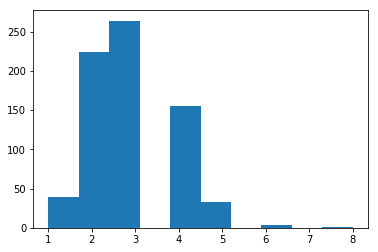

In [695]:
plt.hist(task2['Rooms'])
plt.show()

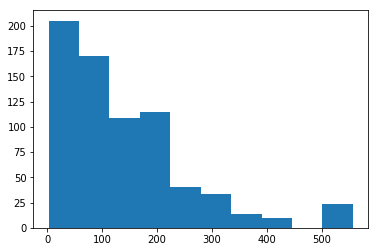

In [696]:
plt.hist(task2['crime_C_average'])
plt.show()

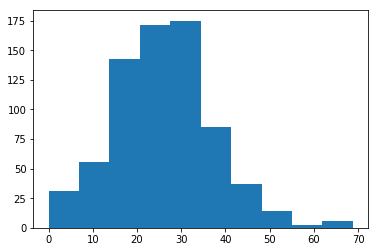

In [697]:
plt.hist(task2['travel_min_to_CBD'])
plt.show()

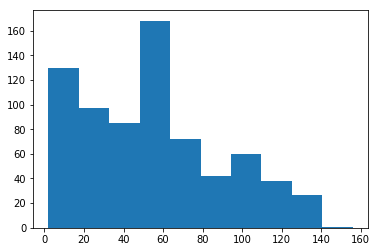

In [698]:
plt.hist(task2['Age'])
plt.show()

## 1.Standardization

In [746]:
std_scale = preprocessing.StandardScaler().fit(task2[['Rooms', 'crime_C_average','travel_min_to_CBD', 'Age']])
df_std = std_scale.transform(task2[['Rooms', 'crime_C_average','travel_min_to_CBD', 'Age']]) # an array not a df
df_std[0:5]

array([[ 1.08714549,  0.09426924,  0.48253446,  1.8291665 ],
       [-0.90965234,  0.09426924,  0.74896785, -0.55868764],
       [ 0.08874657, -0.3111745 ,  0.2772184 , -0.83961165],
       [ 1.08714549, -0.3111745 ,  0.2772184 , -1.31718248],
       [ 0.08874657, -0.26802042,  0.45484067, -0.98007366]])

In [747]:

task2['S_Rooms'] = df_std[:,0] #room scaled
task2['S_crime_C_average'] = df_std[:,1] #crime scaled
task2['S_travel_min_to_CBD'] = df_std[:,2] #time scaled
task2['S_Age'] = df_std[:,3] #age scaled


In [701]:
task2.describe()

,Price,Rooms,crime_C_average,travel_min_to_CBD,Age,S_Rooms,S_crime_C_average,S_travel_min_to_CBD,S_Age
count,7.200000e+02,720.000000,720.000000,720.000000,720.00000,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02
mean,1.061613e+06,2.911111,139.743971,26.233401,53.88750,5.430841e-16,5.859510e-17,3.083953e-18,1.017704e-16
std,5.955281e+05,1.002300,118.520966,11.267677,35.62156,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00
min,2.100000e+05,1.000000,2.666667,0.000000,2.00000,-1.908051e+00,-1.157370e+00,-2.329818e+00,-1.457644e+00
25%,6.450000e+05,2.000000,47.800000,18.333333,21.75000,-9.096523e-01,-7.763005e-01,-7.016140e-01,-9.028196e-01
50%,9.075000e+05,3.000000,112.777778,26.058824,49.00000,8.874657e-02,-2.276807e-01,-1.550443e-02,-1.373016e-01
75%,1.337000e+06,4.000000,188.400000,33.666667,69.00000,1.087145e+00,4.108122e-01,6.601567e-01,4.245464e-01
max,4.275000e+06,8.000000,557.000000,68.818182,156.00000,5.080741e+00,3.522972e+00,3.782003e+00,2.868585e+00


In [748]:
print('Mean after standardisation:\nRooms = {:.2f}, crime_C_average = {:.2f}, S_travel_min_to_CBD = {:.2f}, S_Age = {:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,2].mean(), df_std[:,3].mean()))
print('\nStandard deviation after standardisation:\nRooms = {:.2f}, crime_C_average = {:.2f}, S_travel_min_to_CBD = {:.2f}, S_Age = {:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].std(),df_std[:,3].std()))


Mean after standardisation:
Rooms = 0.00, crime_C_average = -0.00, S_travel_min_to_CBD = 0.00, S_Age = -0.00

Standard deviation after standardisation:
Rooms = 1.00, crime_C_average = 1.00, S_travel_min_to_CBD = 1.00, S_Age = 1.00


(<matplotlib.axes._subplots.AxesSubplot at 0x1feb0c9eb70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb0c9eb70>)

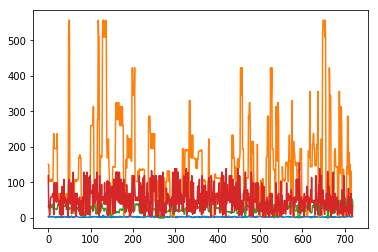

In [704]:
#comparing vaiables before and after plot 
%matplotlib inline

task2["Rooms"].plot(), task2["crime_C_average"].plot(), task2["travel_min_to_CBD"].plot(), task2["Age"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb0d68160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb0d68160>)

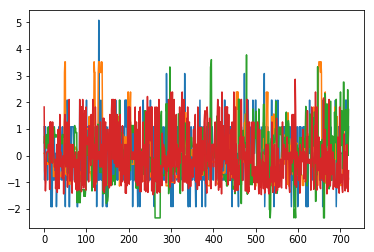

In [707]:
#Now, we plot the standardized data, and observe the range and the centre of the distribution for the standardised features.

task2["S_Rooms"].plot(), task2["S_crime_C_average"].plot(), task2["S_travel_min_to_CBD"].plot(), task2["S_Age"].plot()

We can see from above graphs that both original and standardized data are in the same shape but shifted.

Now comparing with columns with standardized counterpart 

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb0def4a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb0def4a8>)

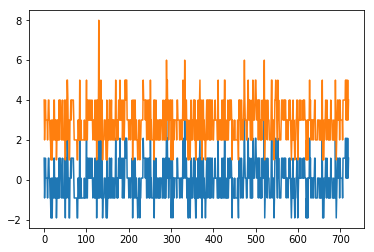

In [710]:
task2["S_Rooms"].plot(), task2["Rooms"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb0e31320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb0e31320>)

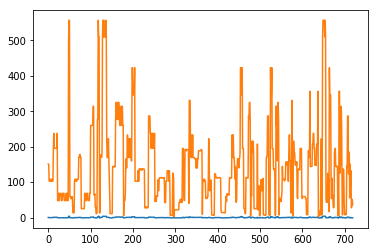

In [711]:
task2["S_crime_C_average"].plot(), task2["crime_C_average"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb0e976a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb0e976a0>)

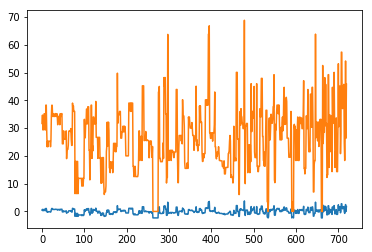

In [712]:
task2["S_travel_min_to_CBD"].plot(), task2["travel_min_to_CBD"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb0f01940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb0f01940>)

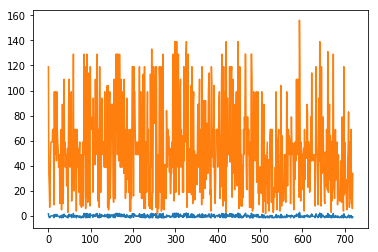

In [713]:
task2["S_Age"].plot(), task2["Age"].plot()

## 2. Min Max Nomalization



In [715]:
minmax_scale = preprocessing.MinMaxScaler().fit(task2[['Rooms', 'crime_C_average','travel_min_to_CBD', 'Age']])
df_minmax = minmax_scale.transform(task2[['Rooms', 'crime_C_average','travel_min_to_CBD', 'Age']])
df_minmax[0:5]

array([[0.42857143, 0.2674247 , 0.46014971, 0.75974026],
       [0.14285714, 0.2674247 , 0.50374284, 0.20779221],
       [0.28571429, 0.18079776, 0.42655644, 0.14285714],
       [0.42857143, 0.18079776, 0.42655644, 0.03246753],
       [0.28571429, 0.19001804, 0.45561853, 0.11038961]])

In [719]:
task2['M_Rooms'] = df_minmax[:,0] #room scaled
task2['M_crime_C_average'] = df_minmax[:,1] #crime scaled
task2['M_travel_min_to_CBD'] = df_minmax[:,2] #time scaled
task2['M_Age'] = df_minmax[:,3] #age scaled

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [717]:
print('Min-value after min-max scaling:\nRooms = {:.2f}, crime_C_average = {:.2f}, travel_min_to_CBD = {:.2f}, Age = {:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min(), df_minmax[:,3].min()))
print('\nMax-value after min-max scaling:\nRooms = {:.2f}, crime_C_average = {:.2f}, travel_min_to_CBD = {:.2f}, Age = {:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(),df_minmax[:,2].max(),df_minmax[:,3].max()))

Min-value after min-max scaling:
Rooms = 0.00, crime_C_average = 0.00, S_travel_min_to_CBD = 0.00, S_Age = 0.00

Max-value after min-max scaling:
Rooms = 1.00, crime_C_average = 1.00, S_travel_min_to_CBD = 1.00, S_Age = 1.00


(<matplotlib.axes._subplots.AxesSubplot at 0x1feb0fb1e10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb0fb1e10>)

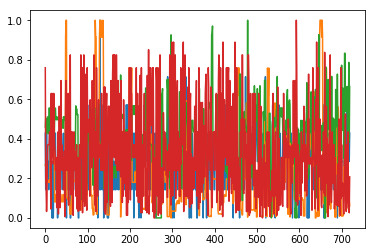

In [720]:
#Now, we plot the normalizaed data, and observe the range and the centre of the distribution for the normalized features.
task2["M_Rooms"].plot(), task2["M_crime_C_average"].plot(), task2["M_travel_min_to_CBD"].plot(), task2["M_Age"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb1feada0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb1feada0>)

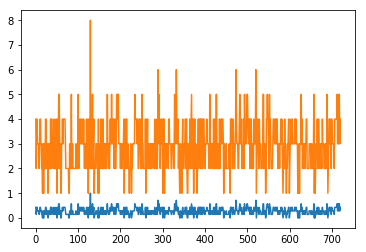

In [721]:
task2["M_Rooms"].plot(), task2["Rooms"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb2040320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb2040320>)

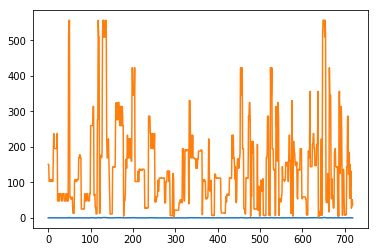

In [722]:
task2["M_crime_C_average"].plot(), task2["crime_C_average"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb20ad4a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb20ad4a8>)

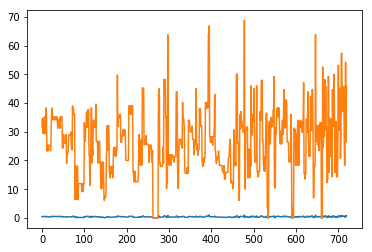

In [723]:
task2["M_travel_min_to_CBD"].plot(), task2["travel_min_to_CBD"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb2107f98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb2107f98>)

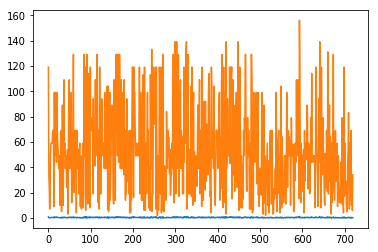

In [724]:
task2["M_Age"].plot(), task2["Age"].plot()

## 3. Root transformation

In [727]:
# 'Rooms', 'crime_C_average','travel_min_to_CBD', 'Age'
task2['R_rooms'] = None
i = 0
for row in task2.iterrows():
    task2['R_rooms'].at[i] = math.sqrt(task2["Rooms"][i])
    i += 1

task2['R_crime_C_average'] = None
i = 0
for row in task2.iterrows():
    task2['R_crime_C_average'].at[i] = math.sqrt(task2["crime_C_average"][i])
    i += 1


task2['R_travel_min_to_CBD'] = None
i = 0
for row in task2.iterrows():
    task2['R_travel_min_to_CBD'].at[i] = math.sqrt(task2["travel_min_to_CBD"][i])
    i += 1
    
    
task2['R_Age'] = None
i = 0
for row in task2.iterrows():
    task2['R_Age'].at[i] = math.sqrt(task2["Age"][i])
    i += 1



C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb217d470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb217d470>)

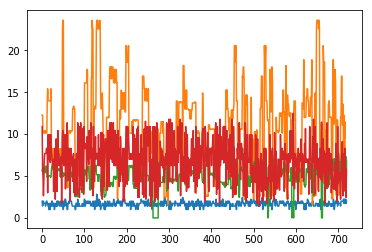

In [729]:
#Now, we plot the ROOT TRANSFORMED data, and observe the range and the centre of the distribution for the ROOT TRANSFORMED features.
task2["R_rooms"].plot(), task2["R_crime_C_average"].plot(), task2["R_travel_min_to_CBD"].plot(), task2["R_Age"].plot()

## 4.Power transformation


In [732]:


# 'Rooms', 'crime_C_average','travel_min_to_CBD', 'Age'
task2['P_rooms'] = None
i = 0
for row in task2.iterrows():
    task2['P_rooms'].at[i] = math.pow(task2["Rooms"][i],2)
    i += 1

task2['P_crime_C_average'] = None
i = 0
for row in task2.iterrows():
    task2['P_crime_C_average'].at[i] = math.pow(task2["crime_C_average"][i],2)
    i += 1


task2['P_travel_min_to_CBD'] = None
i = 0
for row in task2.iterrows():
    task2['P_travel_min_to_CBD'].at[i] = math.pow(task2["travel_min_to_CBD"][i],2)
    i += 1
    
    
task2['P_Age'] = None
i = 0
for row in task2.iterrows():
    task2['P_Age'].at[i] =  math.pow(task2["Age"][i],2)
    i += 1

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(<matplotlib.axes._subplots.AxesSubplot at 0x1feb0f790b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb0f790b8>)

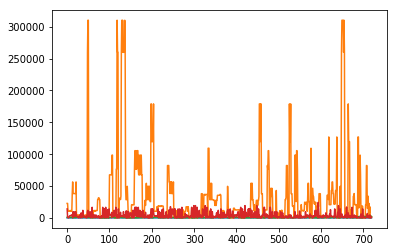

In [733]:
#Now, we plot the POWER TRANSFOEMD data, and observe the range and the centre of the distribution for the POWER TRANSFOEMD  features.
task2["P_rooms"].plot(), task2["P_crime_C_average"].plot(), task2["P_travel_min_to_CBD"].plot(), task2["P_Age"].plot()

## 5. Log Transformation

Log transformation cannot be done if data contains zero value. Therefore scaling the entire data by adding 1 to it.


In [737]:

# 'Rooms', 'crime_C_average','travel_min_to_CBD', 'Age'
task2['L_rooms'] = None
i = 0
for row in task2.iterrows():
    task2['L_rooms'].at[i] = math.log(1+task2["Rooms"][i])
    i += 1

task2['L_crime_C_average'] = None
i = 0
for row in task2.iterrows():
    task2['L_crime_C_average'].at[i] = math.log(1+task2["crime_C_average"][i])
    i += 1


task2['L_travel_min_to_CBD'] = None
i = 0
for row in task2.iterrows():
    task2['L_travel_min_to_CBD'].at[i] = math.log(1+task2["travel_min_to_CBD"][i])
    i += 1
    
    
task2['L_Age'] = None
i = 0
for row in task2.iterrows():
    task2['L_Age'].at[i] =  math.log(1+task2["Age"][i])
    i += 1

(<matplotlib.axes._subplots.AxesSubplot at 0x1feb22b9780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1feb22b9780>)

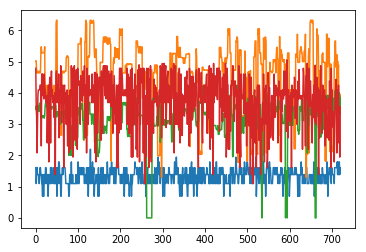

In [738]:
#Now, we plot the LOG TRANSFORMED data, and observe the range and the centre of the distribution for the LOG TRANSFORMED  features.
task2["L_rooms"].plot(), task2["L_crime_C_average"].plot(), task2["L_travel_min_to_CBD"].plot(), task2["L_Age"].plot()

### Fitting regression model to understand which transformation/normalization works best

In [776]:
lm_data=task2[['Rooms','crime_C_average','travel_min_to_CBD','Age','Price']]

X_train, X_test, y_train, y_test = train_test_split(lm_data.iloc[:,:-1],lm_data.iloc[:,-1:])
lm_out = LinearRegression() # object of Linear Regression
lm_out.fit(X_train,y_train)
y_pred=lm_out.predict(X_test)

print ('R-squared value = ',lm_out.score(X_test,y_test))

R-squared value =  0.38628702181856156


In [777]:
print('MSE = ', math.sqrt(mean_squared_error(y_test,y_pred)))

MSE =  431820.25521348487


In [778]:
#REGRESSION MODEL FOR STANDARIZED DATA
lm_data=task2[['S_Rooms','S_crime_C_average','S_travel_min_to_CBD','S_Age','Price']]

X_train, X_test, y_train, y_test = train_test_split(lm_data.iloc[:,:-1],lm_data.iloc[:,-1:])
lm_out = LinearRegression() # object of Linear Regression
lm_out.fit(X_train,y_train)
y_pred=lm_out.predict(X_test)

print ('R-squared value = ',lm_out.score(X_test,y_test))


R-squared value =  0.4182451176437394


In [779]:
print('MSE = ', math.sqrt(mean_squared_error(y_test,y_pred)))

MSE =  439732.23565829353


In [780]:
#REGRESSION MODEL FOR MIN MAX NORMALIZED DATA
lm_data=task2[['M_Rooms','M_crime_C_average','M_travel_min_to_CBD','M_Age','Price']]

X_train, X_test, y_train, y_test = train_test_split(lm_data.iloc[:,:-1],lm_data.iloc[:,-1:])
lm_out = LinearRegression() # object of Linear Regression
lm_out.fit(X_train,y_train)
y_pred=lm_out.predict(X_test)

print ('R-squared value = ',lm_out.score(X_test,y_test))


R-squared value =  0.3961153215888269


In [781]:
print('MSE = ', math.sqrt(mean_squared_error(y_test,y_pred)))

MSE =  484589.1235037066


In [782]:
#REGRESSION MODEL FOR ROOT TRANSFORMED DATA
lm_data=task2[['R_rooms','R_crime_C_average','R_travel_min_to_CBD','R_Age','Price']]

X_train, X_test, y_train, y_test = train_test_split(lm_data.iloc[:,:-1],lm_data.iloc[:,-1:])
lm_out = LinearRegression() # object of Linear Regression
lm_out.fit(X_train,y_train)
y_pred=lm_out.predict(X_test)

print ('R-squared value = ',lm_out.score(X_test,y_test))

R-squared value =  0.4106781774828341


In [783]:
print('MSE = ', math.sqrt(mean_squared_error(y_test,y_pred)))

MSE =  496302.6503186769


In [784]:
#REGRESSION MODEL POWER TRANSFORMED DATA
lm_data=task2[['P_rooms','P_crime_C_average','P_travel_min_to_CBD','P_Age','Price']]

X_train, X_test, y_train, y_test = train_test_split(lm_data.iloc[:,:-1],lm_data.iloc[:,-1:])
lm_out = LinearRegression() # object of Linear Regression
lm_out.fit(X_train,y_train)
y_pred=lm_out.predict(X_test)

print ('R-squared value = ',lm_out.score(X_test,y_test))

R-squared value =  0.4757394717387655


In [785]:
print('MSE = ', math.sqrt(mean_squared_error(y_test,y_pred)))

MSE =  411548.36161487486


In [787]:
#REGRESSION MODEL LOG TRANSFORMED DATA
lm_data=task2[['L_rooms','L_crime_C_average','L_travel_min_to_CBD','L_Age','Price']]

X_train, X_test, y_train, y_test = train_test_split(lm_data.iloc[:,:-1],lm_data.iloc[:,-1:])
lm_out = LinearRegression() # object of Linear Regression
lm_out.fit(X_train,y_train)
y_pred=lm_out.predict(X_test)

print ('R-squared value = ',lm_out.score(X_test,y_test))

R-squared value =  0.2778773081314525


In [788]:
print('MSE = ', math.sqrt(mean_squared_error(y_test,y_pred)))

MSE =  508943.4260727651


### Inference 

From the various transformations and normalizations that have been performed, the power transformation gives the best result in multiple iterations. It has an observed r-square value of 47% which is much greater than the r-square value of model run without any transformation. It also gives the least MSE when the test data and the predicted data is compared.

The same transformation has been applied to rooms, crime_C_avg, time_min_to_CBD and age.

### Conclusion 
In Task 1, various data sources were used to get information regarding PTV, train schedule, house price and crime in a given suburb. GTFS data was primarily used to get train related information. 
Most of the answers were verfied by checking on google maps. The distance and the time from the nearest station.

Crime data was used to understand the average crime based on type ABC. It was observed that crime B had greater average than Crime A or C in most suburbs. Also the median price of properties in a suburb was calculated and almost 50 properties in the dataset had greater median price when compared to other houses in the same suburb.

In Task 2, various transformations and normalization methods were applied to best study their effect on the variables in different scales. The best transformation was verified using linear regression modelling. Power transformation give better R-square values and lower MSE. It was choosen as the best transformation method

### Reference

https://github.com/bobhaffner/medium_posts/blob/master/geopandas_sjoin/geopandas_sjoin.ipynb

https://stackoverflow.com/questions/31269216/applying-uppercase-to-a-column-in-pandas-dataframe

Tutorial 11 content for data normalization